In [146]:
from idlelib.sidebar import get_end_linenumber

import pandas as pd

In [147]:
# NHANES DATABASES links
# https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020
# https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013

# LABEL
# OSQ060 - ever diagnosed with osteoporosis? 1- yes, 2 - no, 7  - refused, 9 - don't know

# PARAMETERS

## Demographic Data P_DEMO
# RIDAGEYR - Age
# RIAGENDR - Gender 1-male, 2-female
# RIDRETH3 - Ethnicity


## Examination Data P_BMX
# BMXWT - weight
# BMXHT - height
# BMXBMI - bmi


## Dietary Data P_DR1TOT
# DR1TVD - vitamin D intake
# DR1TCALC - calcium intake


## Laboratory Data P_BIOPRO
# LBXSCA - total calcium mg/dL


## Questionaire Data
# Osteoporosis P_OSQ
# SEQN - patient number
# OSQ160a - did mother have osteoporosis? 1-mother
# OSQ160b - did father have osteoporosis? 2-father

# Alcohol usage P_ALQ
# ALQ121 - alcohol consumption in past 12 months
# ALQ130 - avg alcoholic drinks/day - past 12 months

# Smoking P_SMQ
# SMQ621 - amount of smoked cigarettes
# SMD030 - age at which started smoking regularly

# Reproductive health P_RHQ
# RHD043 - reason for not having regular periods (7 - menopause, 3 - hysterectomy)
# RHQ060 - age at last menstrual period
# RHQ540 - ever used female hormones? (excludes birth control and use for infertility) 1-yes, 2-no

# Excercise P_PAQ
# PAD615 - vigorous work in minutes on a work day
# PAD660 - vigorous excercise in minutes in a day
# PAD675 - moderate excercise in minutes in a day
# PAD680 - sedentary activity in minutes in a day
# PAD645 - walk/bike in minutes in a day


# not sure if we will use:
    
# OSQ020a - times broken/fractured a hip
# OSQ020b - times broken/fractured a wrist
# OSQ020c - times broken/fractured spine
# OSD050aa - reason for hip fracture
# OSD050ba - reason wrist fracture
# OSD050ca - reason spine fracture

In [148]:
folders = ["2017-2020"]
files = ["OSQ", "DEMO", "BMX", "ALQ", "BIOPRO", "DR1TOT", "PAQ", "RHQ", "SMQ"]
codes = ['SEQN', 'OSQ060', 'OSQ160A', 'OSQ160B', 'ALQ121', 'ALQ130', 'SMQ621', 'SMD030', 'RHD043', 'RHQ060', 'RHQ540', 'PAD615', 'PAD660', 'PAD675', 'PAD680', 'PAD645', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'BMXWT', 'BMXHT', 'BMXBMI', 'DR1TVD', 'DR1TCALC', 'LBXSCA']
labels_mapping = {
    'SEQN': 'patient',
    'OSQ060': 'osteoporosis',
    'OSQ160A': 'mother osteoporosis',
    'OSQ160B': 'father osteoporosis',
    'ALQ121': 'alcohol past 12 mos',
    'ALQ130': 'avg alcohol/day past 12 mos',
    'SMQ621': 'cigarettes smoked',
    'SMD030': 'regular smoking age',
    'RHD043': 'menopause',
    'RHQ060': 'age of last period',
    'RHQ540': 'female HRT',
    'PAD615': 'physical work (min)',
    'PAD660': 'vigorous exercise (min)',
    'PAD675': 'moderate exercise (min)',
    'PAD680': 'sedentary (min)',
    'PAD645': 'walk/bike (min)',
    'RIDAGEYR': 'age',
    'RIAGENDR': 'gender',
    'RIDRETH3': 'ethnicity',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'BMI',
    'DR1TVD': 'vit.D intake',
    'DR1TCALC': 'calcium intake',
    'LBXSCA': 'total calcium mg/dL'
}

data = pd.DataFrame(columns=['patient', 'osteoporosis', 'age', 'gender', 'ethnicity', 'weight', 'height', 'BMI', 'menopause', 'age of last period', 'female HRT',  'vit.D intake', 'calcium intake', 'total calcium mg/dL', 'alcohol past 12 mos', 'avg alcohol/day past 12 mos', 'cigarettes smoked', 'regular smoking age', 'physical work (min)', 'vigorous exercise (min)', 'moderate exercise (min)', 'sedentary (min)', 'walk/bike (min)', 'mother osteoporosis', 'father osteoporosis', ])
for folder in folders:
    for file in files:
        file_path = f"{folder}/{file}.xpt"
        # file_path = "2015-2016/SMQ.xpt"
        df = pd.read_sas(file_path, format="xport")
        filtered = df.filter(items = codes)
        filtered.rename(columns=labels_mapping, inplace=True)
        data = pd.concat([data, filtered], ignore_index=True)
        data = data.groupby('patient', as_index=False).first()
    

# data.dropna(axis=0, how='any', inplace=True)
data = data.dropna(subset=["osteoporosis", "vit.D intake", "calcium intake", "total calcium mg/dL", "age", "gender", "ethnicity", "weight", "height", "alcohol past 12 mos"])
data = data.dropna(thresh=10)



data.dropna(subset=['osteoporosis'], inplace=True)
print(data.shape)
data
# 
# patient_rows = data[data['patient'] == 109290.0]
# patient_rows


C:\Users\Jula\AppData\Local\Temp\ipykernel_9552\704440826.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)
C:\Users\Jula\AppData\Local\Temp\ipykernel_9552\704440826.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)
C:\Users\Jula\AppData\Local\Temp\ipykernel_9552\704440826.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a f

(3361, 25)


C:\Users\Jula\AppData\Local\Temp\ipykernel_9552\704440826.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)
C:\Users\Jula\AppData\Local\Temp\ipykernel_9552\704440826.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, filtered], ignore_index=True)


,patient,osteoporosis,age,gender,ethnicity,weight,height,BMI,menopause,age of last period,...,avg alcohol/day past 12 mos,cigarettes smoked,regular smoking age,physical work (min),vigorous exercise (min),moderate exercise (min),sedentary (min),walk/bike (min),mother osteoporosis,father osteoporosis
11,109274.0,2.0,68.0,1.0,7.0,103.7,185.3,30.2,NaN,NaN,...,2.0,NaN,NaN,480.0,NaN,60.0,300.0,60.0,NaN,NaN
19,109282.0,2.0,76.0,1.0,3.0,83.3,177.1,26.6,NaN,NaN,...,NaN,NaN,18.0,NaN,NaN,NaN,900.0,NaN,NaN,NaN
27,109290.0,2.0,68.0,2.0,4.0,73.0,161.2,28.1,7.0,45.0,...,NaN,NaN,NaN,NaN,NaN,90.0,180.0,30.0,NaN,NaN
35,109298.0,2.0,68.0,1.0,3.0,90.2,162.5,34.2,NaN,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,120.0,NaN,1.0,NaN
37,109300.0,2.0,54.0,2.0,6.0,62.0,144.7,29.6,3.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15549,124812.0,2.0,62.0,2.0,2.0,73.0,159.6,28.7,7.0,30.0,...,3.0,NaN,14.0,NaN,NaN,NaN,240.0,NaN,1.0,NaN
15551,124814.0,2.0,64.0,1.0,4.0,114.3,174.5,37.5,NaN,NaN,...,2.0,NaN,15.0,NaN,NaN,NaN,300.0,20.0,NaN,NaN
15552,124815.0,2.0,52.0,1.0,4.0,94.3,178.8,29.5,NaN,NaN,...,1.0,NaN,27.0,360.0,120.0,120.0,60.0,60.0,NaN,NaN
15554,124817.0,1.0,67.0,2.0,1.0,82.8,147.8,37.9,3.0,47.0,...,2.0,NaN,NaN,10.0,NaN,NaN,180.0,NaN,NaN,NaN


EDA - Exploratory Data Analysis

In [149]:
data = data.drop(columns=['patient'])

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

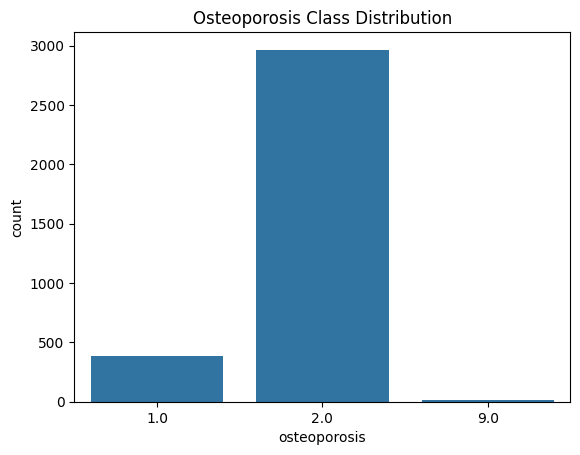

osteoporosis
2.0    2965
1.0     384
9.0      12
Name: count, dtype: int64


In [151]:
sns.countplot(x=data['osteoporosis'])
plt.title("Osteoporosis Class Distribution")
plt.show()

print(data['osteoporosis'].value_counts())

- Balancing needed

In [152]:
data = data[data['osteoporosis'] != 9]

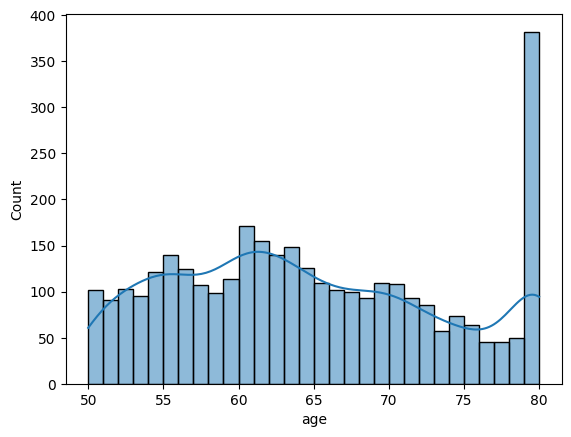

In [153]:
sns.histplot(data['age'], bins=30, kde=True)
plt.show()

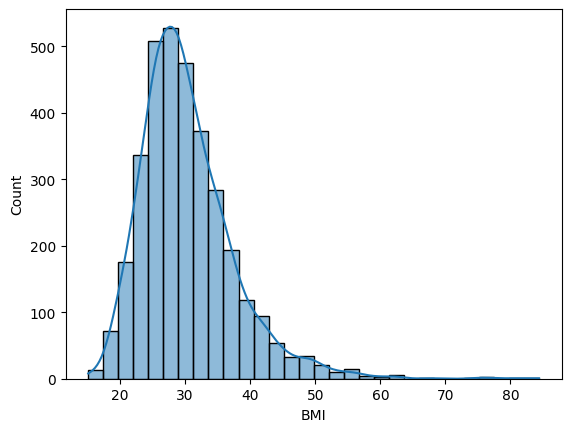

In [154]:
sns.histplot(data['BMI'], bins=30, kde=True)
plt.show()

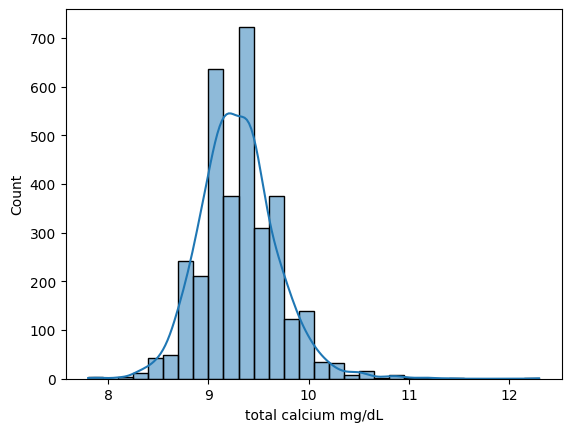

In [155]:
sns.histplot(data['total calcium mg/dL'], bins=30, kde=True)
plt.show()

Osteoporosis vs Age

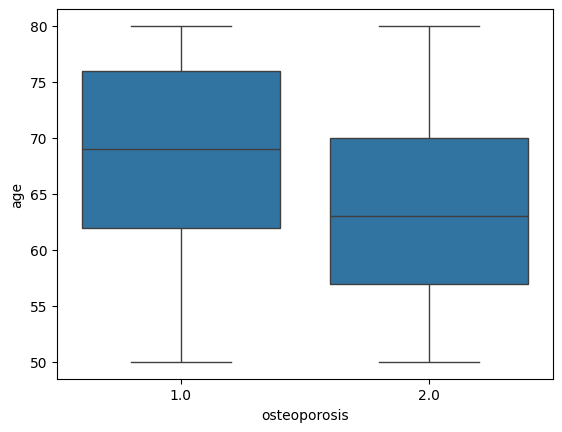

In [156]:
sns.boxplot(x=data['osteoporosis'], y=data['age'])
plt.show()

People with osteoporosis are older, controls are younger - strong predictor

Osteoporosis vs  Calcium

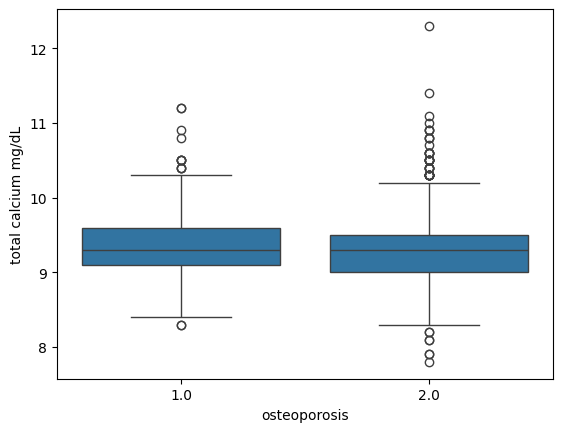

In [157]:
sns.boxplot(x=data['osteoporosis'], y=data['total calcium mg/dL'])
plt.show()

Calcium levels are similar - not a strong predictor

Osteoporosis vs BMI

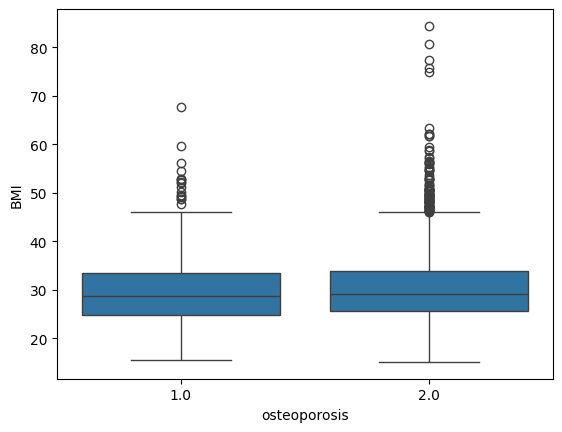

In [158]:
sns.boxplot(x=data['osteoporosis'], y=data['BMI'])
plt.show()

BMI differences are small - not a strong predictor

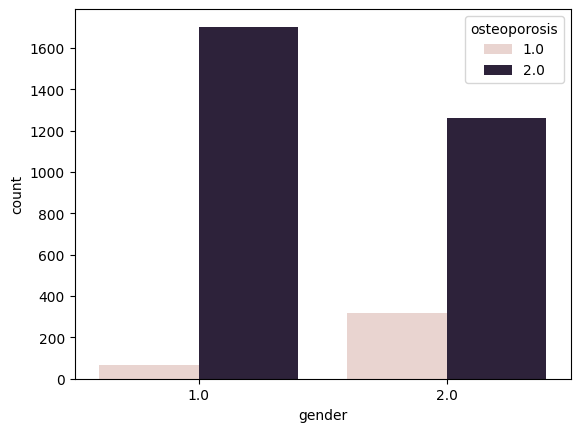

In [159]:
sns.countplot(x=data['gender'], hue=data['osteoporosis'])
plt.show()

Osteoporosis in females is much more common - strong predictor

Dealing with missing values

In [160]:
def check_nan(df):
    nan_columns = df.columns[df.isna().any()].tolist()
    return nan_columns

check_nan(data)

['menopause',
 'age of last period',
 'female HRT',
 'avg alcohol/day past 12 mos',
 'cigarettes smoked',
 'regular smoking age',
 'physical work (min)',
 'vigorous exercise (min)',
 'moderate exercise (min)',
 'sedentary (min)',
 'walk/bike (min)',
 'mother osteoporosis',
 'father osteoporosis']

In [161]:
numeric_cols = [
    'age',
    'weight',
    'height',
    'BMI',
    'vit.D intake',
    'calcium intake',
    'total calcium mg/dL',
    'avg alcohol/day past 12 mos',
    'cigarettes smoked',
    'regular smoking age',
    'physical work (min)',
    'vigorous exercise (min)',
    'moderate exercise (min)',
    'sedentary (min)',
    'walk/bike (min)',
    'age of last period'
]

categorical_cols = [
    'gender',
    'ethnicity',
    'alcohol past 12 mos',
    'menopause',
    'female HRT',
    'mother osteoporosis',
    'father osteoporosis'
]

numeric_cols = [c for c in numeric_cols if c in data.columns]
categorical_cols = [c for c in categorical_cols if c in data.columns]

print("shape numeric subset:", data[numeric_cols].shape)
print("shape categorical subset:", data[categorical_cols].shape)

shape numeric subset: (3349, 16)
shape categorical subset: (3349, 7)


In [162]:
for col in numeric_cols + categorical_cols:
    if col in data.columns:
        data[col + '_was_missing'] = data[col].isna()

data.head()

,osteoporosis,age,gender,ethnicity,weight,height,BMI,menopause,age of last period,female HRT,...,sedentary (min)_was_missing,walk/bike (min)_was_missing,age of last period_was_missing,gender_was_missing,ethnicity_was_missing,alcohol past 12 mos_was_missing,menopause_was_missing,female HRT_was_missing,mother osteoporosis_was_missing,father osteoporosis_was_missing
11,2.0,68.0,1.0,7.0,103.7,185.3,30.2,NaN,NaN,NaN,...,False,False,True,False,False,False,True,True,True,True
19,2.0,76.0,1.0,3.0,83.3,177.1,26.6,NaN,NaN,NaN,...,False,True,True,False,False,False,True,True,True,True
27,2.0,68.0,2.0,4.0,73.0,161.2,28.1,7.0,45.0,2.0,...,False,False,False,False,False,False,False,False,True,True
35,2.0,68.0,1.0,3.0,90.2,162.5,34.2,NaN,NaN,NaN,...,False,True,True,False,False,False,True,True,False,True
37,2.0,54.0,2.0,6.0,62.0,144.7,29.6,3.0,50.0,2.0,...,False,True,False,False,False,False,False,False,True,True


In [163]:
data.drop(columns=['cigarettes smoked'], inplace=True)
numeric_cols.remove('cigarettes smoked')

In [164]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')

num_imputer = SimpleImputer(strategy='median')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
data[numeric_cols]

,age,weight,height,BMI,vit.D intake,calcium intake,total calcium mg/dL,avg alcohol/day past 12 mos,regular smoking age,physical work (min),vigorous exercise (min),moderate exercise (min),sedentary (min),walk/bike (min),age of last period
11,68.0,103.7,185.3,30.2,4.6,1309.0,9.1,2.0,17.5,480.0,60.0,60.0,300.0,60.0,48.0
19,76.0,83.3,177.1,26.6,0.9,770.0,9.1,2.0,18.0,120.0,60.0,45.0,900.0,30.0,48.0
27,68.0,73.0,161.2,28.1,4.1,409.0,9.9,2.0,17.5,120.0,60.0,90.0,180.0,30.0,45.0
35,68.0,90.2,162.5,34.2,0.4,160.0,9.4,2.0,17.5,120.0,60.0,45.0,120.0,30.0,48.0
37,54.0,62.0,144.7,29.6,0.4,155.0,9.0,2.0,17.5,120.0,60.0,45.0,60.0,30.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15549,62.0,73.0,159.6,28.7,3.1,818.0,8.9,3.0,14.0,120.0,60.0,45.0,240.0,30.0,30.0
15551,64.0,114.3,174.5,37.5,0.3,386.0,9.0,2.0,15.0,120.0,60.0,45.0,300.0,20.0,48.0
15552,52.0,94.3,178.8,29.5,6.4,1488.0,9.6,1.0,27.0,360.0,120.0,120.0,60.0,60.0,48.0
15554,67.0,82.8,147.8,37.9,4.2,355.0,8.8,2.0,17.5,10.0,60.0,45.0,180.0,30.0,47.0


In [165]:
cat_imputer = SimpleImputer(strategy='constant', fill_value=0)

cat_imputed_array = cat_imputer.fit_transform(data[categorical_cols])

cat_imputed = pd.DataFrame(cat_imputed_array,
                           columns=categorical_cols,
                           index=data.index)

data[categorical_cols] = cat_imputed
data[categorical_cols] = data[categorical_cols]
data[categorical_cols]

,gender,ethnicity,alcohol past 12 mos,menopause,female HRT,mother osteoporosis,father osteoporosis
11,1.0,7.0,4.000000e+00,0.0,0.0,0.0,0.0
19,1.0,3.0,5.397605e-79,0.0,0.0,0.0,0.0
27,2.0,4.0,5.397605e-79,7.0,2.0,0.0,0.0
35,1.0,3.0,5.397605e-79,0.0,0.0,1.0,0.0
37,2.0,6.0,5.397605e-79,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
15549,2.0,2.0,6.000000e+00,7.0,2.0,1.0,0.0
15551,1.0,4.0,4.000000e+00,0.0,0.0,0.0,0.0
15552,1.0,4.0,3.000000e+00,0.0,0.0,0.0,0.0
15554,2.0,1.0,3.000000e+00,3.0,2.0,0.0,0.0


In [181]:
from sklearn.utils import resample

minority = data[data['osteoporosis'] == 1]
majority = data[data['osteoporosis'] == 2]

majority_down = resample(
    majority,
    replace=False,
    n_samples=2000,
    random_state=42
)

data_balanced = pd.concat([minority, majority_down])

In [166]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [182]:
X = data_balanced.drop(columns=['osteoporosis'])
y = data_balanced['osteoporosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [184]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

1st method - Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    class_weight={1: 5, 2: 1},
    random_state=42
)
model.fit(X_train_res, y_train_res)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [186]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices[:20]:
    print(X.columns[i], importances[i])

menopause 0.10312302760774825
gender 0.08900402300404957
female HRT 0.07751390024706102
age 0.07218230328399727
height 0.06517762376646605
weight 0.04965183534308096
calcium intake 0.045966763947807174
BMI 0.04423612686954864
vit.D intake 0.039645514107682724
age of last period 0.03818983595483803
sedentary (min) 0.03634055619687478
mother osteoporosis 0.03551881218260964
total calcium mg/dL 0.03534950760448938
ethnicity 0.03272778784513118
alcohol past 12 mos 0.03001694597106898
regular smoking age 0.027978405179662425
avg alcohol/day past 12 mos 0.022756698864300033
moderate exercise (min)_was_missing 0.020307075147019897
vigorous exercise (min)_was_missing 0.01929988194380746
moderate exercise (min) 0.01707788162026439


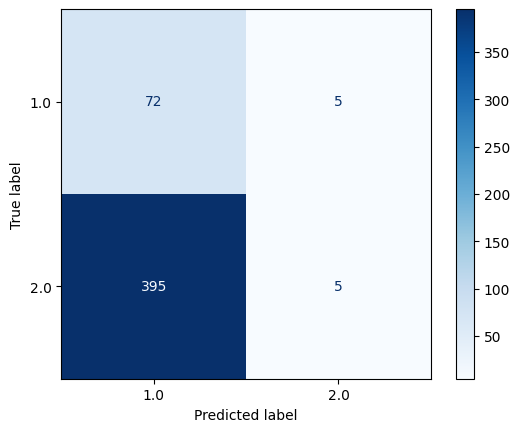

              precision    recall  f1-score   support

         1.0       0.15      0.94      0.26        77
         2.0       0.50      0.01      0.02       400

    accuracy                           0.16       477
   macro avg       0.33      0.47      0.14       477
weighted avg       0.44      0.16      0.06       477



In [195]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

probs = model.predict_proba(X_test)[:, 1]
y_pred_thr = np.where(probs >= 0.35, 1, 2)
cm = confusion_matrix(y_test, y_pred_thr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred_thr))

2nd method - XGBoost Classifier

In [196]:
from xgboost import XGBClassifier

In [201]:
y_train_bin = (y_train_res == 1).astype(int)  # 1 if osteoporosis, else 0
y_test_bin  = (y_test == 1).astype(int)

In [202]:
neg = (y_train_bin == 0).sum()
pos = (y_train_bin == 1).sum()
spw = neg / pos
print("scale_pos_weight =", spw)

scale_pos_weight = 1.0


In [203]:
model_xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    scale_pos_weight=spw,
    random_state=42
)

model_xgb.fit(X_train_res, y_train_bin)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


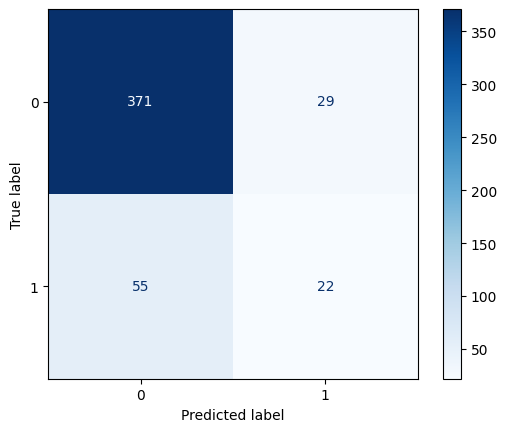

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       400
           1       0.43      0.29      0.34        77

    accuracy                           0.82       477
   macro avg       0.65      0.61      0.62       477
weighted avg       0.80      0.82      0.81       477



In [207]:
y_pred_bin = model_xgb.predict(X_test)

cm = confusion_matrix(y_test_bin, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # 0 - no osteoporosis, 1 - osteoporosis
disp.plot(cmap='Blues')
plt.show()
print(classification_report(y_test_bin, y_pred_bin))

In [208]:
probs = model_xgb.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20]

for t in thresholds:
    y_thr = np.where(probs >= t, 1, 0)
    print(f"--- Threshold = {t} ---")
    print(confusion_matrix(y_test_bin, y_thr))
    print(classification_report(y_test_bin, y_thr))

--- Threshold = 0.5 ---
[[371  29]
 [ 55  22]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       400
           1       0.43      0.29      0.34        77

    accuracy                           0.82       477
   macro avg       0.65      0.61      0.62       477
weighted avg       0.80      0.82      0.81       477

--- Threshold = 0.45 ---
[[368  32]
 [ 54  23]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       400
           1       0.42      0.30      0.35        77

    accuracy                           0.82       477
   macro avg       0.65      0.61      0.62       477
weighted avg       0.80      0.82      0.81       477

--- Threshold = 0.4 ---
[[362  38]
 [ 54  23]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       400
           1       0.38      0.30      0.33        77

    accuracy                           0

The optimal threshold for the XGBoost classifier was 0.20

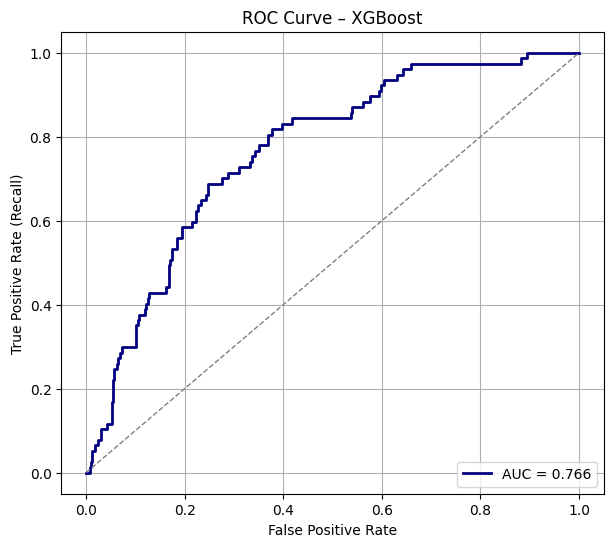

In [209]:
from sklearn.metrics import roc_curve, auc

probs = model_xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

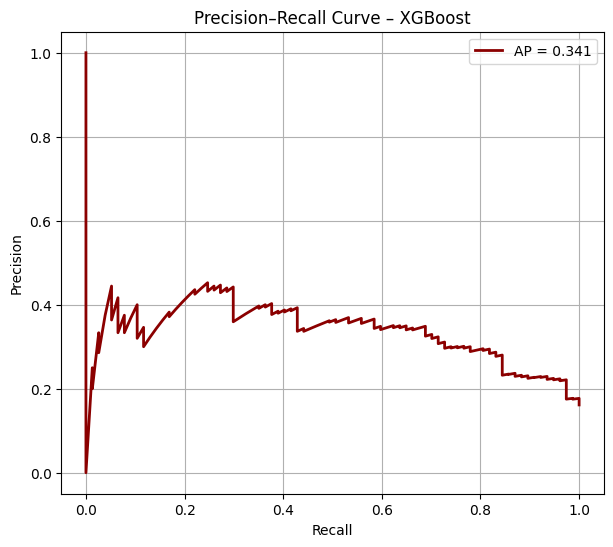

In [210]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test_bin, probs)
ap = average_precision_score(y_test_bin, probs)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, lw=2, color='darkred', label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – XGBoost')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

C:\Users\Jula\Documents\PWr\7 sem\AI labs\osteoporosis-AI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


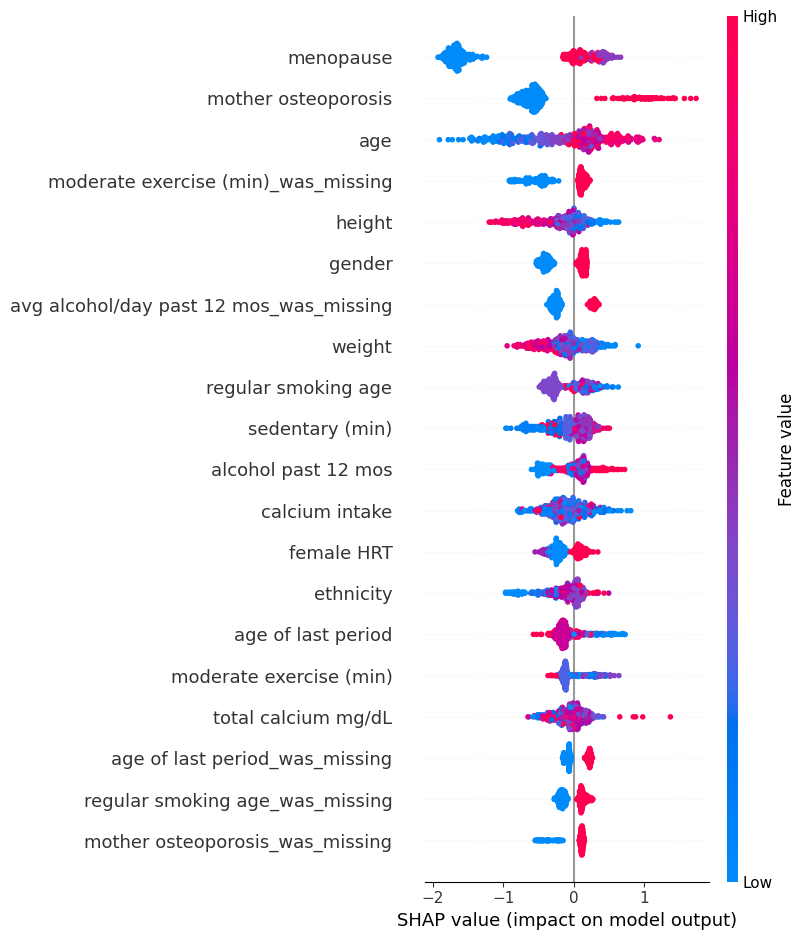

In [211]:
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="dot")